In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage,AnnotationBbox
from matplotlib.font_manager import fontManager, FontProperties
import ptitprince as pt

# path = "font/seguiemj.ttf"
# fontManager.addfont(path)

# prop = FontProperties(fname=path)
# sns.set(font=prop.get_family())
# plt.rcParams['font.family'] = prop.get_family()


def get_img(name):
     path = "font/emojis/{}.png".format(name)
     im = plt.imread(path)
     return im

def offset_image(coord, name, ax, size=0.5):
    img = get_img(name)
    im = OffsetImage(img, zoom=size)
    im.image.axes = ax

    ab = AnnotationBbox(im, (coord, 0),  xybox=(0., -21.), frameon=False,
                        xycoords='data',  boxcoords="offset points", pad=0)

    ax.add_artist(ab)

def raincloud(x, y, markersize, df, order):
    # adding color
    pal = sns.color_palette()
    # f, ax = plt.subplots(figsize=(5*2.5, 5*2.5))

    means = df.groupby(x)[y].mean().reindex(order)
    sns.scatterplot(x=means.index, y=means, color='white', edgecolor='black', s=150/2, linewidth=1.5, zorder=4)


    ax = pt.half_violinplot(x=x, y=y, data=df, palette=pal, bw=.25, cut=0., linewidth=0, 
                            scale="area", width=.7, inner=None, orient='v', zorder=1, order=order)

    ax = sns.stripplot(x=x, y=y, data=df, palette=pal, edgecolor="white",  linewidth=1, order=order,
                       size=markersize, orient='v', zorder=2, jitter=1, alpha=0.6)


    ax2 = sns.pointplot(x=x, y=y, data=df, color='black',  join=False, errorbar='se', linewidth=1, edgecolor='black', capsize=.06, zorder=3, bw=0, order=order)
    
 


In [75]:
df = pd.read_csv('HUMANS/turing_5.csv')
df = df[df.prolific_id.isin(df.prolific_id.value_counts()[df.prolific_id.value_counts() == 138].index)]

print("complete =", (df.groupby('prolific_id').prolific_id.count() == 138).sum())
print("incomplete =", (df.groupby('prolific_id').prolific_id.count() != 138).sum())
print("dataset_id that are complete =", df.dataset_id.value_counts()==138)
print("dataset_id that are incomplete =", [i for i in range(77) if i not in df.dataset_id.value_counts().index])

df['correct'] = None
df['correct'] = df.correct.astype(bool)
df['agree1'] = None
df['agree1'] = df.agree1.astype(bool)
df['agree2'] = None
df['agree2'] = df.agree2.astype(bool)

df.loc[df.q_id==2, 'correct'] = df.source == df.answer
df.loc[df.q_id==1, 'agree2'] = df.answer.str.contains('Yes')
df.loc[df.q_id==0, 'agree1'] = df.answer.str.contains('Yes')

# avg.head()
assert all(df.item_id.value_counts() == 3)

# add correct and agree1 to all rows where item id is the same (easier to plot)
for i in df.item_id.unique():
    df.loc[df.item_id==i, 'correct'] = df[(df.item_id==i) & (df.q_id==2)].correct.values[0]
    df.loc[df.item_id==i, 'agree1'] = df[(df.item_id==i) & (df.q_id==0)].agree1.values[0]
    df.loc[df.item_id==i, 'agree2'] = df[(df.item_id==i) & (df.q_id==1)].agree2.values[0]
# df['agree1']
df

complete = 5
incomplete = 0
dataset_id that are complete = 0    True
2    True
3    True
4    True
5    True
Name: dataset_id, dtype: bool
dataset_id that are incomplete = [1, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]


,prolific_id,dataset_id,respondent_id,title,cond,source,id_first,item_idx,item_id,q_id,q0,a0,a1,question,answer,rt,time,correct,agree1,agree2
0,613ab311df99420815403fe9,0,3.0,Lifeboat 2,personal_moral,AI,0,0,33,0,You are on a cruise ship when there is a fire ...,yes,the reason is that the person is already goi...,Do you agree with the first answer from the bl...,No,38880,2023-01-27 00:03:40,True,False,False
1,613ab311df99420815403fe9,0,3.0,Lifeboat 2,personal_moral,AI,0,0,33,1,You are on a cruise ship when there is a fire ...,yes,the reason is that the person is already goi...,Do you agree with the second answer from the b...,No,38880,2023-01-27 00:03:40,True,False,False
2,613ab311df99420815403fe9,0,3.0,Lifeboat 2,personal_moral,AI,0,0,33,2,You are on a cruise ship when there is a fire ...,yes,the reason is that the person is already goi...,Do you think the blue character involved in th...,AI,38880,2023-01-27 00:03:40,True,False,False
3,613ab311df99420815403fe9,0,60d8f98d9d58bf54aeb8438a,Stock Tip,impersonal_moral,Human,0,1,16,0,You are a management consultant working on a c...,no,it is illegal and immoral,Do you agree with the first answer from the bl...,Yes,32572,2023-01-27 00:04:13,True,True,True
4,613ab311df99420815403fe9,0,60d8f98d9d58bf54aeb8438a,Stock Tip,impersonal_moral,Human,0,1,16,2,You are a management consultant working on a c...,no,it is illegal and immoral,Do you think the blue character involved in th...,Human,32572,2023-01-27 00:04:13,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,6153144b6c389cb97e3169c3,5,601c2a9251c0bc6ca76c8d75,Footbridge,personal_moral,Human,0,44,242,0,A runaway trolley is heading down the tracks t...,no,it would be more appropriate for me to jump do...,Do you agree with the first answer from the bl...,Yes,11800,2023-01-27 02:27:29,True,True,True
701,6153144b6c389cb97e3169c3,5,601c2a9251c0bc6ca76c8d75,Footbridge,personal_moral,Human,0,44,242,2,A runaway trolley is heading down the tracks t...,no,it would be more appropriate for me to jump do...,Do you think the blue character involved in th...,Human,11800,2023-01-27 02:27:30,True,True,True
702,6153144b6c389cb97e3169c3,5,23.0,Infanticide,personal_moral,AI,1,45,239,2,You are a fifteen year-old girl who has become...,no,there are a number of reasons why this would...,Do you think the blue character involved in th...,AI,16661,2023-01-27 02:27:46,True,True,True
703,6153144b6c389cb97e3169c3,5,23.0,Infanticide,personal_moral,AI,1,45,239,0,You are a fifteen year-old girl who has become...,no,there are a number of reasons why this would...,Do you agree with the first answer from the bl...,Yes,16661,2023-01-27 02:27:46,True,True,True


/tmp/ipykernel_198993/1484839306.py:13: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png')


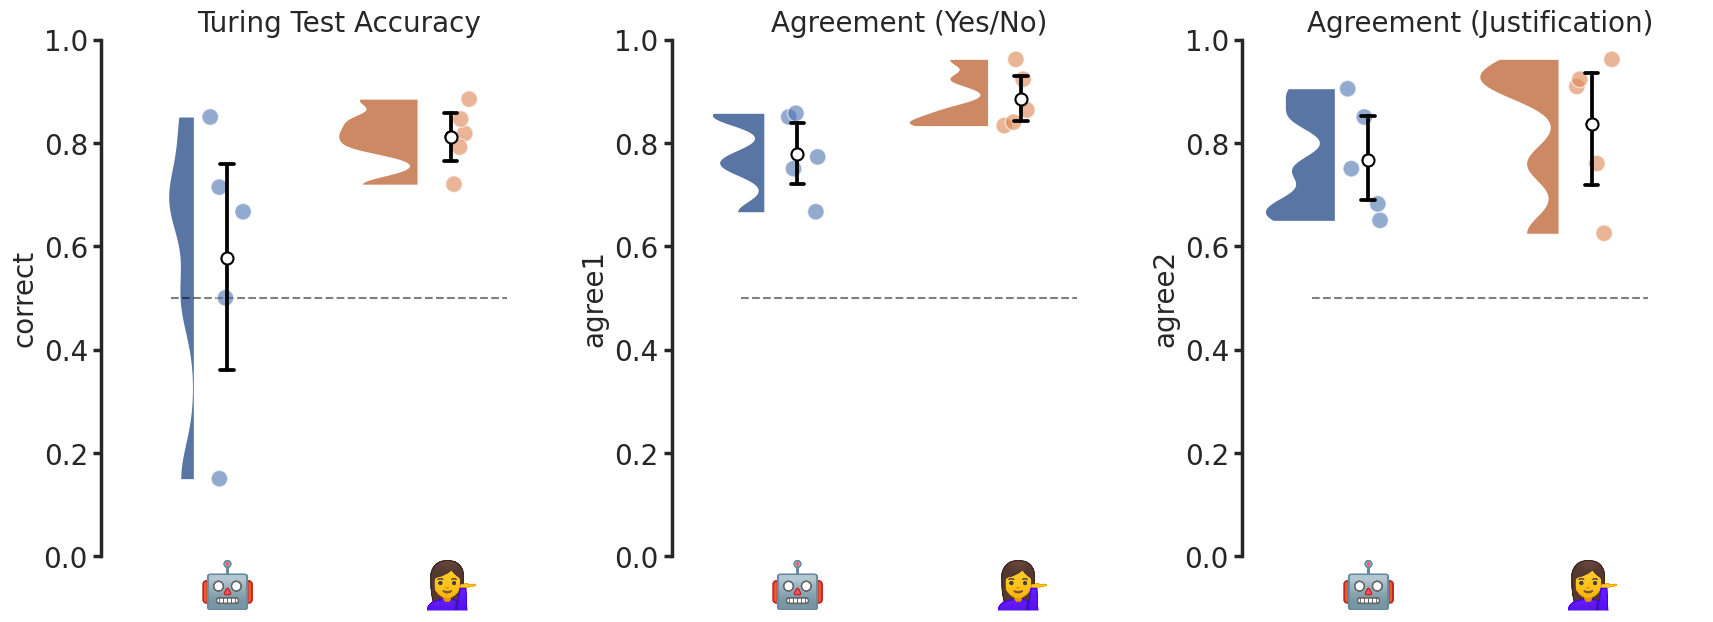

In [52]:
# prit(j)
sns.set({'figure.figsize':(23, 8), 'figure.dpi': 300, 'font.size': 16})
sns.set(
    rc={'figure.figsize':(23,6), "figure.dpi": 100, 'legend.fontsize': 20, 'axes.labelsize': 20, 'axes.titlesize': 20,
      'xtick.labelsize': 11, 'ytick.labelsize': 20, 'font.family': 'sans-serif',
      'font.sans-serif': 'Arial', 'text.usetex': False})
# set S2 as default style
# sns.set_palette('Set2')
sns.set_palette('deep')
sns.set_style("ticks")

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')
plt.rcParams['ytick.major.width'] = 2.5


# -------------------------------------------------------------------------------
# Plot 1: Turing Test 
# -------------------------------------------------------------------------------
avg = df[df.q_id==2].groupby(['prolific_id', 'source'], as_index=False).mean()
plt.subplot(1, 4, 1)
# sns.barplot(x='source', y='correct', data=avg, errorbar='se')
# sns.stripplot(x='source', y='correct', data=avg, alpha=0.5, jitter=0.1, size=15, color='black')
#
plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
raincloud(x='source', y='correct', markersize=12, df=avg, order=['AI', 'Human'])
plt.ylim(0, 1)
plt.xticks(range(2), ('', ''))
plt.xlabel('')
plt.title('Turing Test Accuracy')
plt.xticks([])
plt.gca().spines['left'].set_linewidth(2.5)
for i, c in enumerate(avg.source.unique()):
    offset_image(i, c, plt.gca(), size=0.3)
sns.despine(offset=10, trim=True, bottom=True);

# -------------------------------------------------------------------------------
# Plot 2: Agreement 1
# -------------------------------------------------------------------------------
avg = df[df.q_id==0].groupby(['prolific_id', 'source'], as_index=False).mean()
plt.subplot(1, 4, 2)
plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
raincloud(x='source', y='agree1', markersize=12, df=avg, order=['AI', 'Human'])
# sns.barplot(x='source', y='agree1', data=avg, errorbar='se')
# sns.stripplot(x='source', y='agree1', data=avg, color='black', alpha=0.5, jitter=0.1, size=15)
plt.ylim(0, 1)
plt.xticks(range(2), ('', ''))
plt.xlabel('')
plt.title('Agreement (Yes/No)')
plt.xticks([])
plt.gca().spines['left'].set_linewidth(2.5)
for i, c in enumerate(avg.source.unique()):
    offset_image(i, c, plt.gca(), size=0.3)
sns.despine(offset=10, trim=True, bottom=True);


# -------------------------------------------------------------------------------
# Plot 3: Agreement 2
# -------------------------------------------------------------------------------
avg = df[df.q_id==1].groupby(['prolific_id', 'source'], as_index=False).mean()
plt.subplot(1, 4, 3)
plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
raincloud(x='source', y='agree2', markersize=12, df=avg, order=['AI', 'Human'])
# sns.barplot(x='source', y='agree2', data=avg, errorbar='se')
# sns.stripplot(x='source', y='agree2', data=avg, color='black', alpha=0.5, jitter=0.1, size=15)
plt.ylim(0, 1)
plt.title('Agreement (Justification)')
plt.xticks(range(2), ('', ''))
plt.xlabel('')
plt.xticks([])
for i, c in enumerate(avg.source.unique()):
    offset_image(i, c, plt.gca(), size=0.3)
sns.despine(offset=10, trim=True, bottom=True);
plt.gca().spines['left'].set_linewidth(2.5)
plt.xticks([])

# -------------------------------------------------------------------------------
# Plot 4: RT
# -------------------------------------------------------------------------------
#avg = df.groupby(['prolific_id', 'source'], as_index=False).mean()
#plt.subplot(1, 4, 4)
## plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
## plt.plot([-1, 2], [0.5, 0.5], '--', color='black', alpha=0.5)
##sns.barplot(x='source', y='rt', data=avg, errorbar='se')
##sns.stripplot(x='source', y='rt', data=avg, color='black', alpha=0.5, jitter=0.1, size=15)
#raincloud(x='source', y='rt', markersize=12, df=avg, order=['AI', 'Human'])
#plt.ylim(0, 100000)
#plt.title('RT (ms)')
#plt.xlabel('')
#sns.despine(offset=10, trim=True, bottom=True);
#plt.xticks([])
#plt.gca().spines['left'].set_linewidth(2.5)
#for i, c in enumerate(avg.source.unique()):
#    offset_image(i, c, plt.gca(), size=0.3)
#
plt.tight_layout()

Text(0.5, 0, '')

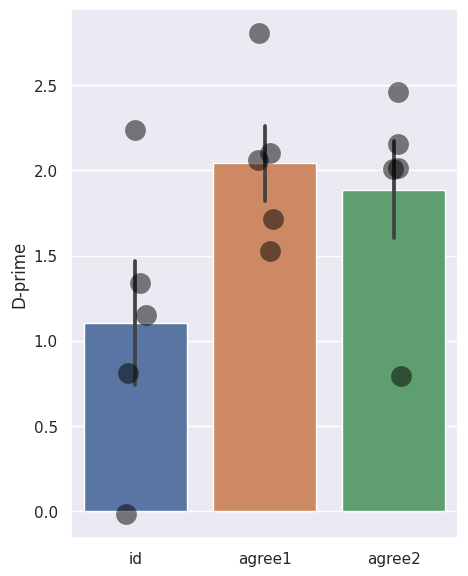

In [110]:
import scipy.stats as stats


sns.set({'figure.figsize':(5, 7), 'figure.dpi': 100, 'font.size': 13})

false = pd.DataFrame()
hits = pd.DataFrame()

labels = ['id', 'agree1', 'agree2']
titles = ['Turing Test Accuracy', 'Agreement (Yes/No)', 'Agreement (Justification)']

false['id'] = 1 - df[(df.source=='Human') & (df.q_id == 2)].groupby('prolific_id', as_index=False).mean().correct
hits['id'] = df[(df.source=='AI') & (df.q_id == 2)].groupby('prolific_id', as_index=False).mean().correct
false['agree1'] = 1 - df[(df.source=='Human') & (df.q_id == 0)].groupby('prolific_id', as_index=False).mean().agree1
hits['agree1'] = df[(df.source=='AI') & (df.q_id == 0)].groupby('prolific_id', as_index=False).mean().agree1
false['agree2'] = 1 - df[(df.source=='Human') & (df.q_id == 1)].groupby('prolific_id', as_index=False).mean().agree2
hits['agree2'] = df[(df.source=='AI') & (df.q_id == 1)].groupby('prolific_id', as_index=False).mean().agree2

d = []
for i in range(false['id'].shape[0]):
    for l in labels:
        d.append({'cond': l, 'D-prime': stats.norm.ppf(hits[l].values[i]) - stats.norm.ppf(false[l].values[i])})

d = pd.DataFrame(d)# plt.subplot(1, 4, 1)
sns.barplot(x='cond', y='D-prime', data=d, errorbar='se')
sns.stripplot(x='cond', y='D-prime', data=d, alpha=0.5, jitter=0.1, size=15, color='black')
# plt.ylim(0, 1)
# plt.xticks(range(2), ('', ''))
plt.xlabel('')
# plt.title('Signal sensitivity')
# for i, c in enumerate(avg.source.unique()):
    # offset_image(i, c, plt.gca(), size=0.3)



,prolific_id,source,correct,dataset_id,id_first,item_idx,item_id,q_id,rt,agree1,agree2
0,5effa1b1767027080863869d,AI,False,3.0,0.666667,15.333333,152.333333,1.0,30102.333333,1.000000,1.000000
1,5effa1b1767027080863869d,AI,True,3.0,0.352941,23.000000,170.000000,1.0,33855.647059,0.705882,0.588235
2,5effa1b1767027080863869d,Human,False,3.0,1.000000,29.333333,148.333333,1.0,30057.333333,1.000000,1.000000
3,5effa1b1767027080863869d,Human,True,3.0,0.347826,22.173913,162.652174,1.0,31304.260870,0.913043,0.956522
4,60772d61bc996f9fa5806f3f,AI,False,2.0,0.625000,17.625000,119.875000,1.0,114874.750000,0.750000,0.750000
5,60772d61bc996f9fa5806f3f,AI,True,2.0,0.437500,23.875000,117.625000,1.0,55691.562500,0.625000,0.750000
6,60772d61bc996f9fa5806f3f,Human,False,2.0,0.250000,21.500000,127.000000,1.0,56121.500000,0.750000,0.750000
7,60772d61bc996f9fa5806f3f,Human,True,2.0,0.388889,23.666667,112.000000,1.0,54074.000000,0.888889,0.944444
8,60e5cb4ca01a593fce9a379d,AI,False,4.0,0.352941,25.176471,210.588235,1.0,42105.588235,0.941176,0.941176
9,60e5cb4ca01a593fce9a379d,AI,True,4.0,0.666667,9.333333,203.333333,1.0,53059.333333,0.333333,0.333333


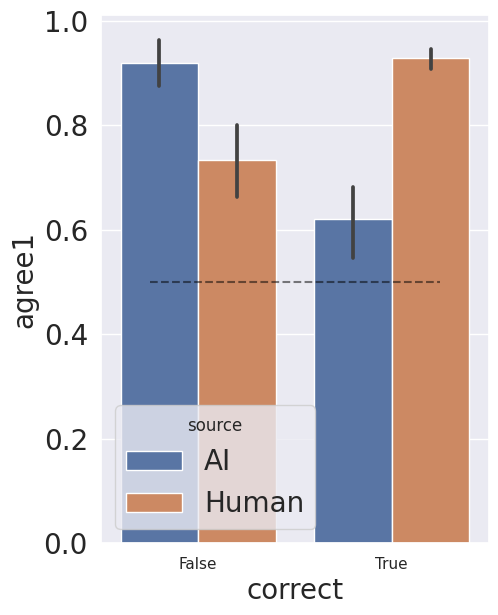

In [80]:
# -------------------------------------------------------------------------------
# Plot 2: Agreement 1
# -------------------------------------------------------------------------------
sns.set({'figure.figsize':(5, 7), 'figure.dpi': 100, 'font.size': 13})
avg = df[df.q_id.isin([0, 2])].groupby(['prolific_id', 'source', 'correct'], as_index=False).mean()
# plt.subplot(1, 4, 2)
plt.plot([-0.25, 1.25], [0.5, 0.5], '--', color='black', alpha=0.5)
#raincloud(x='source', y='agree1', markersize=12, df=avg, order=['AI', 'Human'])
sns.barplot(x='correct', y='agree1', hue='source', data=avg, ci=68)
# sns.stripplot(x='correct', y='agree1', hue='source', data=avg, color='black', alpha=0.5, jitter=0.1, size=15)

avg
#plt.ylim(0, 1)
#plt.xticks(range(2), ('', ''))
#plt.xlabel('')
#plt.title('Agreement (Yes/No)')
#plt.xticks([])
#plt.gca().spines['left'].set_linewidth(2.5)
#for i, c in enumerate(avg.source.unique()):
#    offset_image(i, c, plt.gca(), size=0.3)
#sns.despine(offset=10, trim=True, bottom=True);


